# Proyek Analisis Data: [E-Commerce Public Dataset]

### Nama : Asy Syams Darussalam
### Email: darussalamasysyams@gmail.com
### ID Dicoding: asysyamsdarussalam04

## Menentukan Pertanyaan Bisnis
### 1. Bagaimana performa penjualan dan revenue e-commerce dalam beberapa bulan terakhir?
### 2. Kategori Produk apa yang paling banyak dan paling sedikit terjual?
### 3. Bagaimana Demografi Pelanggan di E-commerce Public?
### 4. Siapakah Seller / Penjual dengan jumlah penjualan tertinggi?
### 5. Metode pembayaran yang paling sering digunakan dan yang sedikit digunakan?
### 6. Berapakan jumlah nilai dari setiap ratingnya?

## Menyiapkan Semua Library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Menampilkan Data Customer

customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# Menampilkan Data Geolocation

geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
# Menampilkan Data Order Items

order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Menampilkan Data Order Payments

order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
# Menampilkan Data Order Reviews

order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
# Menampilkan Data Order

orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# Menampilkan Data Product Category Name Translation

product_category_name_df = pd.read_csv("product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
# Menampilkan Data Products

products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
# Menampilkan Data Sellers

sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assesing Data

#### Menilai Data Customers

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  0


In [18]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Data Geolocation

In [19]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [20]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [21]:
print("Jumlah Duplikasi: ", geolocation_df.duplicated().sum())

Jumlah Duplikasi:  261831


In [22]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai Data Order Items

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
print("Jumlah Duplikasi: ", order_items_df.duplicated().sum())

Jumlah Duplikasi:  0


In [26]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [27]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Menilai Data Order Payments

In [28]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
print("Jumlah Duplikasi: ", order_payments_df.duplicated().sum())

Jumlah Duplikasi:  0


In [31]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

#### Menilai Order Reviews

In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
print("Jumlah Duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah Duplikasi:  0


In [35]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

#### Menilai Data Orders

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [39]:
print("Jumlah Duplikasi: ", orders_df.duplicated().sum())

Jumlah Duplikasi:  0


In [40]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Data Product Category Name Translation

In [41]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [42]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [43]:
print("Jumlah Duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah Duplikasi:  0


In [44]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai Data Products

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [47]:
print("Jumlah Duplikasi: ", products_df.duplicated().sum())

Jumlah Duplikasi:  0


In [48]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Data Sellers

In [49]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [50]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [51]:
print("Jumlah Duplikasi: ", sellers_df.duplicated().sum())

Jumlah Duplikasi:  0


In [52]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan Data Geolocation

In [53]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [54]:
geolocation_df.duplicated().sum()

261831

In [55]:
geolocation_df.drop_duplicates(inplace=True)

In [56]:
geolocation_df.duplicated().sum()

0

#### Memebersihkan Data Order Reviews

In [57]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Missing Values

In [58]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [59]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [60]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [61]:
order_reviews_df.dropna(axis=0, inplace=True)

In [62]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan Data Orders

In [63]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Memperbaiki tipe data

In [64]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [65]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [66]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [67]:
orders_df.dropna(axis=0, inplace=True)

In [68]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan Data Product

In [69]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [70]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [71]:
products_df.dropna(axis=0, inplace=True)

In [72]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [73]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
7575,65b9b5ce785c22668628edb304992629,2ec20d01e0044bc8c80a9540cf156cb9,9361,maua,SP
62109,34a015971bd8681dda63a6ac74d6c825,dc12569409e7f9dcd01e3449cb883571,65922,joao lisboa,MA
20874,379b3766c44cc3a8b2dd64273f7d52a8,33474d59974d4a1789fabfb2ed42a6dc,28615,nova friburgo,RJ
18159,2bed5aac2f46c272a55b05a033ff7516,55419b2cd1d32adad5eb3d4d9f208d1e,9530,sao caetano do sul,SP
86736,3d5cfaf96174fab5cc8de497fc5b21c9,2397e908f0e37c8a7f6547bb1ff192ff,2130,sao paulo,SP


In [74]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [75]:
customers_df.customer_id.is_unique

True

In [76]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [77]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore geolocation_df

In [78]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
170037,6765,-23.618637,-46.771959,taboão da serra,SP
685211,44380,-12.670555,-39.113996,cruz das almas,BA
634895,37650,-22.753316,-46.139259,camanducaia,MG
954456,92990,-29.997954,-51.305117,eldorado do sul,RS
648512,38400,-18.914799,-48.276840,uberlandia,MG


### Explore order_items_df

In [79]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
98317,def7170630f9076d10d4506289972002,1,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2018-03-05 14:49:09,53.9,17.63
81225,b899a41fdae17968d357d705b073a5ce,2,8e3eb37785e42b6b3721e459f1bfaaef,e9bc59e7b60fc3063eb2290deda4cced,2018-08-06 13:24:17,100.0,23.85
28031,3fd1f1349635cb4c9b1f43de5594396e,1,d3c044bd42d84a79e3b0c42662806a48,4c2b230173bb36f9b240f2b8ac11786e,2017-09-27 14:44:47,25.9,11.85
81204,b88d53a015d4f2c2ca019f846a7f523c,2,b1fa0cf0885504d458c2a48e376ea087,6562efe88ce0826a4ca4f189f03b4b84,2017-04-04 17:43:56,49.9,14.52
58796,85df002ba0e8668b282706e73132a0e5,1,d20f41d8b70e59cb4c63d68b1dcfc0a4,6edacfd9f9074789dad6d62ba7950b9c,2017-06-15 02:23:01,42.9,15.10


In [80]:
order_items_df.groupby(by="price").product_id.nunique().sort_values(ascending=False)

price
59.90      698
69.90      541
39.90      537
49.90      529
29.90      473
          ... 
106.74       1
107.04       1
107.15       1
107.53       1
6735.00      1
Name: product_id, Length: 5968, dtype: int64

In [81]:
order_items_df.groupby(by="freight_value").product_id.nunique().sort_values(ascending=False)

freight_value
15.10     1909
7.78      1066
11.85     1016
14.10      993
18.23      972
          ... 
6.37         1
61.63        1
61.68        1
61.73        1
409.68       1
Name: product_id, Length: 6999, dtype: int64

### Explore order_reviews

In [82]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
33754,0c9cff8afb198aa886d387f6c4dc7815,a07137b5e914d5a3b1270f7e3687e4da,5,perfeito,podem comprar muito bom facil de limpar,2018-08-30 00:00:00,2018-08-31 11:51:25
24550,54e31529c7eba933035f1e4aaf02d7e7,c22f6ba7f27b03c0882d2c2ce2a3f3a9,5,super recomendo,"Atendimento com agilidade,principalmente em ti...",2018-08-07 00:00:00,2018-08-14 15:50:49
55915,ecb890ec2394903bb3783f6f1b2c8935,816c0409fb7624265037bcbadc488c2b,1,Produto alterado,"A placa não é nova, foi alterada e não funcion...",2018-05-04 00:00:00,2018-05-07 10:44:23
91048,ef6c6cda54d6c07c1afefe1dffbc6bb4,0216ea85f929ce4795f933573c6bb055,5,Amei,"Perfeito, amei muito linda a cor, e o tecido m...",2018-06-20 00:00:00,2018-06-23 00:44:53
48615,d2f0647b637d40c737dbbf555f58b510,b1ec6c247af2e78825a5cee5cacc925e,5,recomendo,tudo ok,2018-08-04 00:00:00,2018-08-07 10:27:42


In [83]:
order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    5412
1    1771
4    1430
3     733
2     452
Name: review_id, dtype: int64

### Explore order_payments

In [84]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
3017,79dbadc3cd0a6aa1b1fc17d005721668,1,credit_card,5,54.34
7064,bd80c61aa79867f184f4b01d69b6c03c,1,voucher,1,93.12
60216,0f33fb71f898568a0193fcbc892cf511,1,credit_card,3,64.09
88048,0d217515e77987c3856fba474f3300fc,1,credit_card,1,47.81
53598,d13968a3d7333c0ea002f500594b9925,1,credit_card,10,984.72


In [85]:
order_payments_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       293
77.57       250
100.00      249
35.00       165
73.34       160
           ... 
222.07        1
222.09        1
222.11        1
222.15        1
13664.08      1
Name: order_id, Length: 29077, dtype: int64

In [86]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders_df

In [87]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
29950,6f433e1b5764eb255869aedbee1b9d72,643ae37af3bdfee8f50a9dbba9d2d70a,delivered,2018-01-11 16:23:09,2018-01-11 16:35:27,2018-01-15 15:04:56,2018-01-29 21:06:59,2018-02-14
40233,5d6f7de589fed3156a711dfd607e7f50,d8e8abfdd5595791e6839dd57db99559,delivered,2017-04-20 14:36:55,2017-04-20 14:50:16,2017-04-25 15:00:48,2017-05-16 10:45:34,2017-05-25
30399,905295157bd28424f6c3139dcde920aa,097ce021afdda40c7055a54a30c2f6bd,delivered,2018-02-24 15:00:27,2018-02-24 15:10:24,2018-02-28 21:38:50,2018-03-29 16:37:22,2018-03-22
46512,5e51a64decd482cc34e99e406942efc5,748ccb204126f50c1afa1315a1cc0f07,delivered,2018-03-10 23:03:54,2018-03-10 23:40:21,2018-03-12 20:33:41,2018-04-03 19:36:26,2018-04-04
92508,cd5c3847a5c93d505f96c0ffca7f3a24,28d0de17637cefa3a21e6d1cfdbcd749,delivered,2017-10-23 09:41:02,2017-10-23 09:56:09,2017-10-25 17:03:26,2017-10-31 22:12:24,2017-11-16


In [88]:
# Mencari jumlah order yang terkirim dan yang tidak terkirim

orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered    96455
canceled         6
Name: order_id, dtype: int64

In [89]:
# Menambah kolom waktu pengiriman

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [90]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,9.292429
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-16.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,4.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,7.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,12.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.000000
std,NaN,NaN,NaN,NaN,NaN,8.777252


In [91]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


<Axes: >

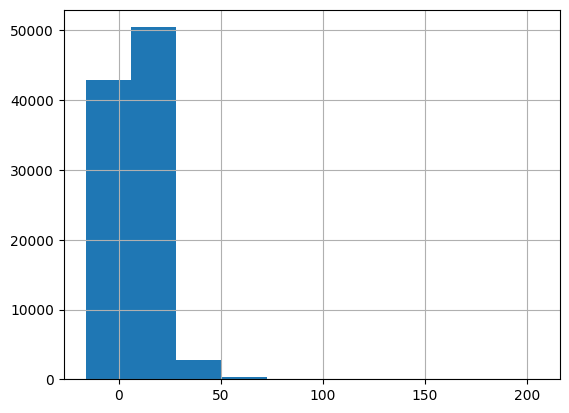

In [92]:
orders_df.delivery_time.hist()

### Explore products_df

In [93]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20433,af54833766006d685742bf140e6f0086,eletrodomesticos,60.0,171.0,1.0,1600.0,60.0,8.0,36.0
13707,0dfb3f08547a24999bb7ec4d025b7d7d,pet_shop,50.0,263.0,1.0,200.0,20.0,15.0,15.0
14174,dd4bb630f241ce3910d9595b395efeb5,pet_shop,23.0,1151.0,1.0,160.0,16.0,11.0,11.0
20563,8d070077591cb06503a4933e5050bc69,moveis_escritorio,46.0,1200.0,1.0,10075.0,53.0,51.0,18.0
13727,b4decdbf54d275fc3c56ade817a12f29,beleza_saude,28.0,515.0,1.0,650.0,20.0,30.0,20.0


In [94]:
products_df.groupby(by="product_weight_g").product_id.nunique().sort_values(ascending=False)

product_weight_g
200.0      1985
300.0      1528
150.0      1243
400.0      1175
100.0      1173
           ... 
2283.0        1
2245.0        1
2243.0        1
2240.0        1
40425.0       1
Name: product_id, Length: 2202, dtype: int64

In [95]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Explore sellers_df

In [96]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3008,63272377184e969942f7fff221be858d,3340,sao paulo,SP
2706,236585a4ddb5fea9fa40233e2249ed91,95088,caxias do sul,RS
2978,5415337f1863452476d42d9f14a16a61,30840,belo horizonte,MG
1562,2ee0a0689f2f6a72f35a7cb6033f6e7e,19025,presidente prudente,SP
1311,f615fe7efbef0f4f08fd3086bc7a3e60,12940,atibaia,SP


In [97]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [98]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore customers_df & orders_df

In [99]:
orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [100]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: order_id, dtype: int64

In [101]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

In [102]:
orders_customers_df.groupby(by="delivery_time").order_id.nunique().sort_values(ascending=False).head(10)

delivery_time
7.0     9326
6.0     8851
1.0     8207
5.0     7242
3.0     6928
8.0     6551
4.0     6232
2.0     5254
9.0     4371
10.0    3988
Name: order_id, dtype: int64

### Explore orders_customers_df & order_items_df

In [103]:
order_items_customers_df = pd.merge(
    left = orders_customers_df,
    right = order_items_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
order_items_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### Explore order_items_df & sellers_df

In [104]:
order_items_sellers_df = pd.merge(
    left = order_items_df,
    right = sellers_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
order_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [105]:
#seller dengan jumlah penjualan tertinggi

order_items_sellers_df.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False).head(10)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
955fee9216a65b617aa5c0531780ce60    1287
7a67c85e85bb2ce8582c35f2203ad736    1160
ea8482cd71df3c1969d7b9473ff13abc    1146
4869f7a5dfa277a7dca6462dcf3b52b2    1132
3d871de0142ce09b7081e2b9d1733cb1    1080
Name: order_id, dtype: int64

In [106]:
order_items_sellers_df.groupby(by="seller_id").order_item_id.nunique().sort_values(ascending=False).head(10)

seller_id
2709af9587499e95e803a6498a5a56e9    21
8e6d7754bc7e0f22c96d255ebda59eba    20
ce27a3cc3c8cc1ea79d11e561e9bebb6    20
0b36063d5818f81ccb94b54adfaebbf5    15
f326006815956455b2859abd58fe7e39    15
e7d5b006eb624f13074497221eb37807    14
1f50f920176fa81dab994f9023523100    14
98dac6635aee4995d501a3972e047414    12
634964b17796e64304cadf1ad3050fb7    12
1025f0e2d44d7041d6cf58b6550e0bfa    11
Name: order_item_id, dtype: int64

In [107]:
order_items_sellers_df.groupby(by="price").seller_id.nunique().sort_values(ascending=False).head(10)

price
59.9    270
39.9    258
69.9    246
49.9    241
29.9    238
89.9    221
79.9    208
99.9    195
19.9    172
99.0    159
Name: seller_id, dtype: int64

In [108]:
order_items_sellers_df.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "price": ["min", "max"]
})

product_id   price        
                                    nunique     min     max
seller_id                                                  
0015a82c2db000af6aaaf3ae2ecb0532          1  895.00  895.00
001cca7ae9ae17fb1caed9dfb1094831         11   69.90  199.00
001e6ad469a905060d959994f1b41e4f          1  250.00  250.00
002100f778ceb8431b7a1020ff7ab48f         24    9.90  129.90
003554e2dce176b5555353e4f3555ac8          1  120.00  120.00
...                                     ...     ...     ...
ffcfefa19b08742c5d315f2791395ee5          1   69.90   69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3         12   13.00  214.00
ffeee66ac5d5a62fe688b9d26f83f534          3   89.99  149.99
fffd5413c0700ac820c7069d66d98c89         29   39.80  636.00
ffff564a4f9085cd26170f4732393726         15   11.50  366.50

[3095 rows x 3 columns]

### Explore order_items_seller_df & products_df 

In [111]:
order_items_sellers_products_df = pd.merge(
    left = order_items_sellers_df,
    right = products_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
order_items_sellers_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [112]:
order_items_sellers_products_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
utilidades_domesticas     5884
relogios_presentes        5624
telefonia                 4199
automotivo                3897
brinquedos                3886
Name: order_id, dtype: int64

In [113]:
order_items_sellers_products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": ["min", "max"]
})

product_id  price         
                             nunique    min      max
product_category_name                               
agro_industria_e_comercio         74  12.99  2990.00
alimentos                         82   9.99   274.99
alimentos_bebidas                104   6.50   699.90
artes                             55   3.50  6499.00
artes_e_artesanato                19   9.80   289.49
...                              ...    ...      ...
sinalizacao_e_seguranca           93   4.50   740.00
tablets_impressao_imagem           9  14.90   889.99
telefonia                       1134   5.00  2428.00
telefonia_fixa                   116   6.00  1790.00
utilidades_domesticas           2335   3.06  6735.00

[73 rows x 3 columns]

### Explore orders_customers_df & order_payments_df

In [116]:
orders_customers_payments_df = pd.merge(
    left = orders_customers_df,
    right= order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [117]:
orders_customers_payments_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False).head(10)

payment_value
50.00     290
77.57     246
100.00    243
35.00     161
73.34     158
20.00     146
116.94    130
56.78     116
107.78    114
65.00     111
Name: order_id, dtype: int64

## Explore all_data

### Menghubungkan semua data dari setiap tabel

In [118]:
all_data_df = pd.merge(
    left=orders_customers_payments_df,
    right=order_items_sellers_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [119]:
all_data_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id   price
customer_city       product_category_name                        
abadia dos dourados cool_stuff                          1  199.00
                    esporte_lazer                       1  120.00
                    livros_interesse_geral              1   39.90
abadiania           eletroportateis                     1  949.99
abaete              bebes                               1   65.00
...                                                   ...     ...
ze doca             bebes                               1   74.80
                    esporte_lazer                       1  149.90
                    ferramentas_jardim                  1   39.90
                    instrumentos_musicais               1  359.00
zortea              informatica_acessorios              1   69.90

[24911 rows x 2 columns]

In [120]:
all_data_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id    price
customer_state product_category_name                              
AC             artigos_de_natal                         1    69.90
               automotivo                               5   606.97
               bebes                                    3   697.84
               beleza_saude                             8  1386.58
               brinquedos                               3   234.79
...                                                   ...      ...
TO             portateis_casa_forno_e_cafe              1  1999.00
               relogios_presentes                      33  4920.89
               telefonia                               22  1268.12
               telefonia_fixa                           2  1390.99
               utilidades_domesticas                   18   999.97

[1362 rows x 2 columns]

In [121]:
all_data_df.groupby(by=["seller_city", "product_category_name"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id    price
seller_city     product_category_name                         
abadia de goias beleza_saude                        1   142.47
afonso claudio  eletroportateis                     2   198.00
                informatica_acessorios              4    56.70
                moveis_decoracao                    1    39.29
aguas claras df esporte_lazer                       1    35.00
...                                               ...      ...
votuporanga     utilidades_domesticas              15  1687.30
xanxere         automotivo                          7  2082.25
                musica                              1    79.90
xaxim           cool_stuff                          2   500.00
                papelaria                           1   110.00

[3111 rows x 2 columns]

In [122]:
all_data_df.groupby(by=["seller_state", "product_category_name"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id      price
seller_state product_category_name                             
AM           telefonia                             3    1177.00
BA           alimentos_bebidas                    45    5470.05
             bebes                                 5     849.50
             bebidas                               1     145.90
             beleza_saude                         19    1518.80
...                                              ...        ...
SP           sinalizacao_e_seguranca             246   15062.10
             tablets_impressao_imagem             92    6950.32
             telefonia                          4440  190937.88
             telefonia_fixa                      310   47697.59
             utilidades_domesticas              6733  398574.40

[495 rows x 2 columns]

In [123]:
all_data_df.groupby(by=["order_status", "product_category_name"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id      price
order_status product_category_name                                
canceled     beleza_saude                             3      79.89
             brinquedos                               1      99.99
             esporte_lazer                            1      21.50
             fashion_bolsas_e_acessorios              1     135.00
             perfumaria                               2     309.80
...                                                 ...        ...
delivered    sinalizacao_e_seguranca                307   21390.63
             tablets_impressao_imagem                93    7840.31
             telefonia                             5216  325423.00
             telefonia_fixa                         354   56033.48
             utilidades_domesticas                 9296  648187.74

[78 rows x 2 columns]

# Visualization & Explanatory Analysis

## Bagaimana performa penjualan dan revenue e-commerce dalam beberapa bulan terakhir?

In [124]:
all_data_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
23586,188f31b5ce7e58114dc03f7d6289f9a4,61691ca23f39f8e8e2d01afdc2f00e41,delivered,2018-06-15 16:04:04,2018-06-16 16:18:19,2018-06-18 13:09:00,2018-07-08 18:11:06,2018-07-19,20.0,74092b9d4919431b8b4c02fd8569bccd,...,araguari,MG,brinquedos,55.0,741.0,2.0,4384.0,39.0,35.0,34.0
100266,bf0fbfbaceba1d05f31c53ef4303ff9c,5620b482dd82a92c989c7f4d456e68e5,delivered,2017-09-13 16:51:13,2017-09-13 17:05:21,2017-09-15 18:37:49,2017-09-26 18:42:19,2017-10-05,11.0,f5d84b273ebeb0aec61dfccbfd18679a,...,sao paulo,SP,utilidades_domesticas,40.0,220.0,3.0,1200.0,20.0,25.0,20.0
47385,47a5dd9a5772c85c82fbfc11a43a1f6c,fd07281333f163bbc2a3f2b71d6cc549,delivered,2018-03-22 15:32:20,2018-03-23 09:55:28,2018-03-28 15:21:13,2018-03-29 17:12:14,2018-04-04,1.0,1c2214f2e89df8198bc28e21bb723dbc,...,sao paulo,SP,informatica_acessorios,53.0,2620.0,3.0,5550.0,16.0,10.0,11.0
55783,2545865a7855db1c3ffd110faf83261a,ff8f6d3e8686235229636f5b388e3b44,delivered,2018-01-03 20:40:15,2018-01-03 20:50:30,2018-01-05 22:34:15,2018-01-22 23:19:17,2018-02-01,17.0,ea77749bef0ca28ab93f391cda660f71,...,sao jose dos campos,SP,informatica_acessorios,33.0,300.0,1.0,207.0,19.0,11.0,14.0
95461,2e84d66424ec0ddb081078d1411fb1db,8d668ebf82d5e30bfd13822db8b51d59,delivered,2017-01-19 16:17:57,2017-01-20 02:05:28,2017-01-20 14:11:32,2017-01-27 16:07:50,2017-03-01,7.0,6390d97ae2f3c536d8a95344fd308a71,...,tres coracoes,MG,moveis_decoracao,63.0,838.0,1.0,1500.0,43.0,5.0,30.0


### Mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya

In [125]:
monthly_orders_df = all_data_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,42295.97
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,120037.59


### Membuat Lice Chart

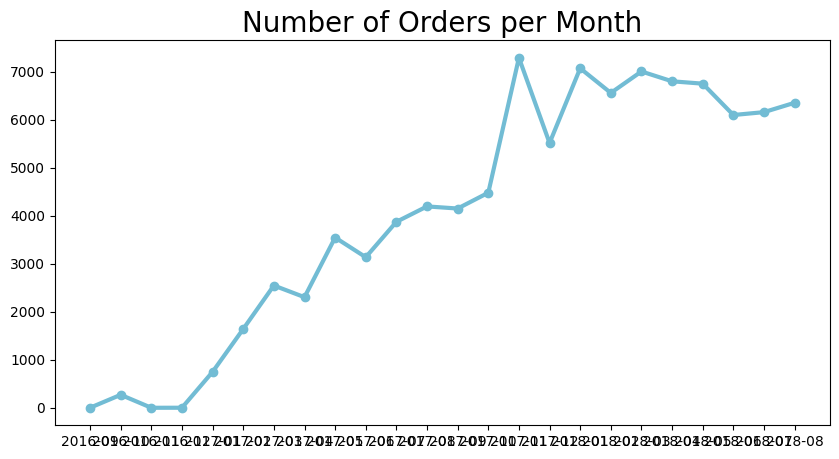

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=3,
    color="#72BCD4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

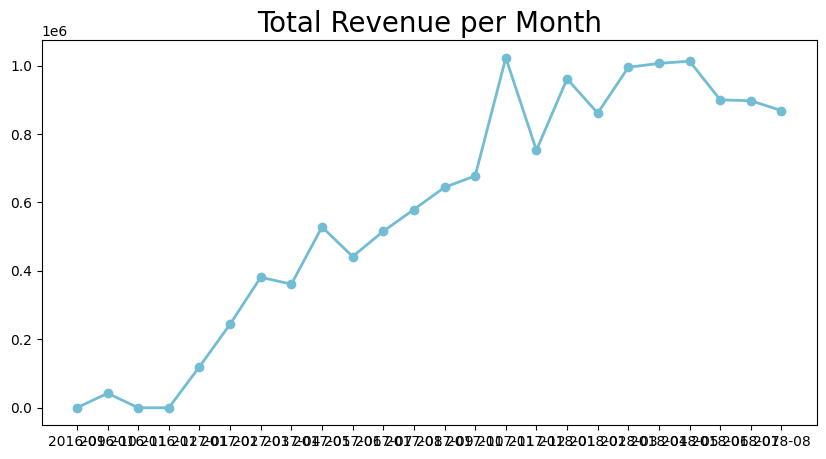

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Kategori Produk apa yang paling banyak dan paling sedikit terjual?

In [131]:
sum_order_items_products_df = all_data_df.groupby(by="product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_products_df.head()

,product_category_name,order_item_id
0,cama_mesa_banho,14347
1,moveis_decoracao,11800
2,beleza_saude,11195
3,esporte_lazer,10041
4,informatica_acessorios,9960


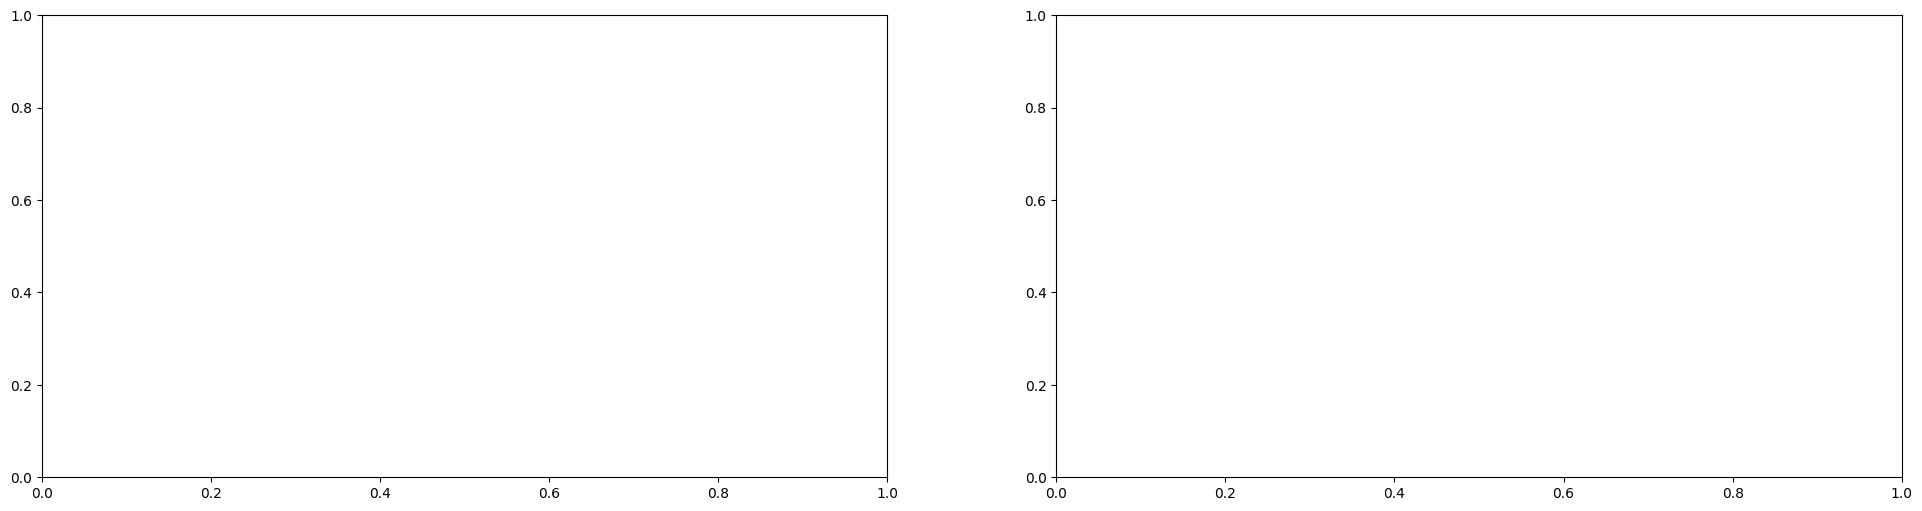

In [132]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2850704423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_products_df.head(5), palette=colors, ax=ax[0])
C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2850704423.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_products_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


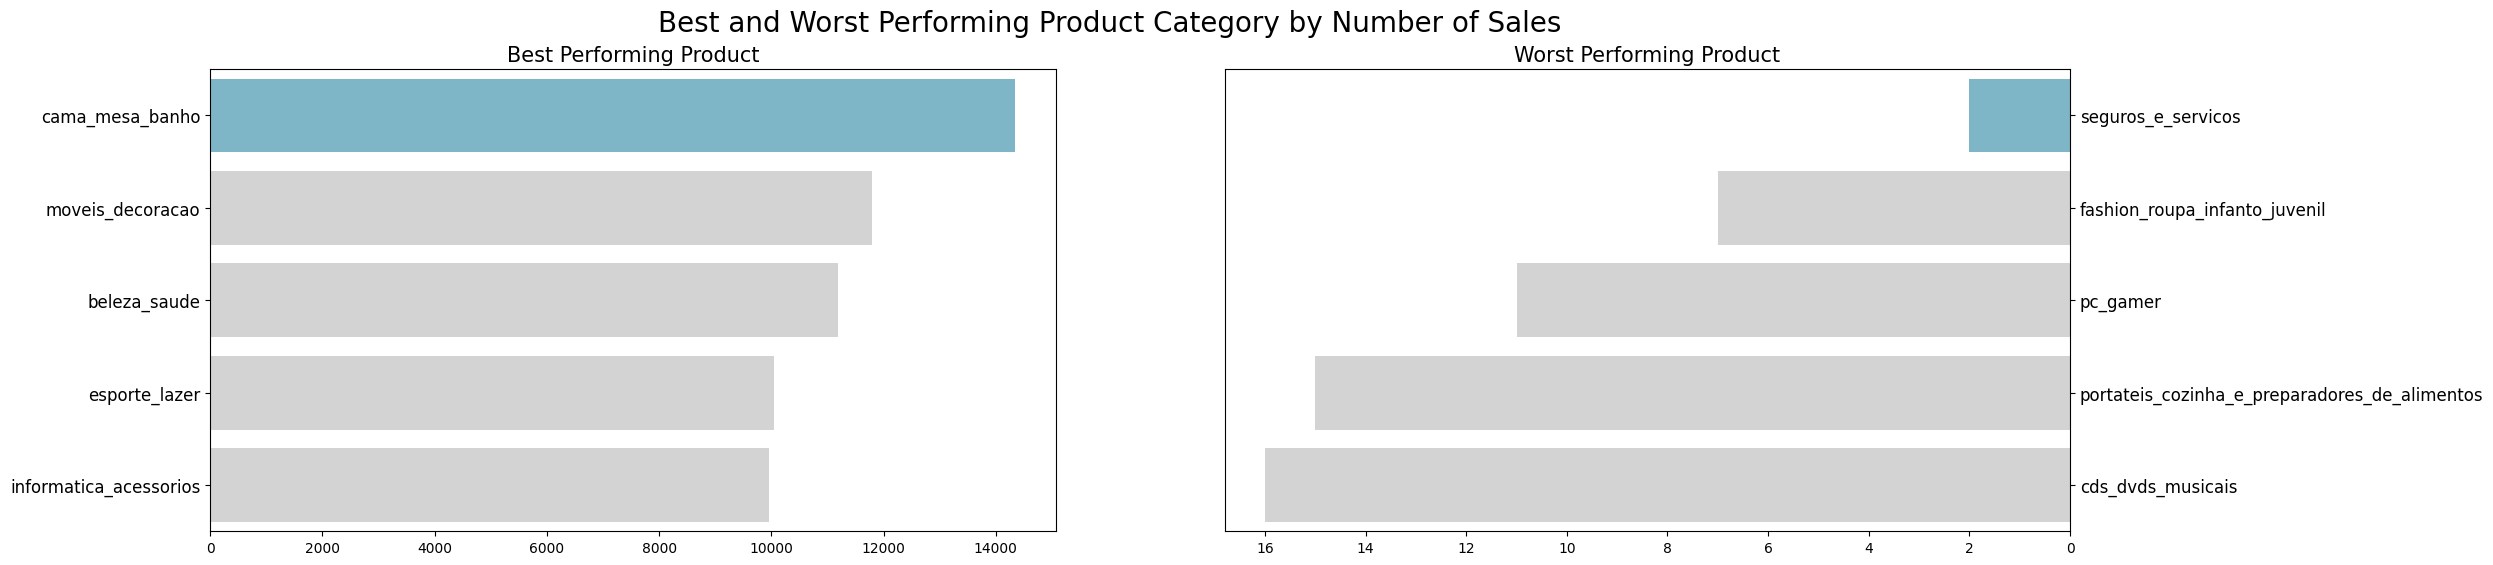

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_products_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_products_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

## Bagaimana Demografi Pelanggan di E-commerce Public?

### Berdasarkan Kota

In [175]:
bycity_df = orders_customers_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df = bycity_df.sort_values(by="customer_count", ascending=False).reset_index(drop=True)
bycity_df

,customer_city,customer_count
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
...,...,...
4080,ponto novo,1
4081,ponto do marambaia,1
4082,ponto belo,1
4083,pontes gestal,1


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\3971012914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


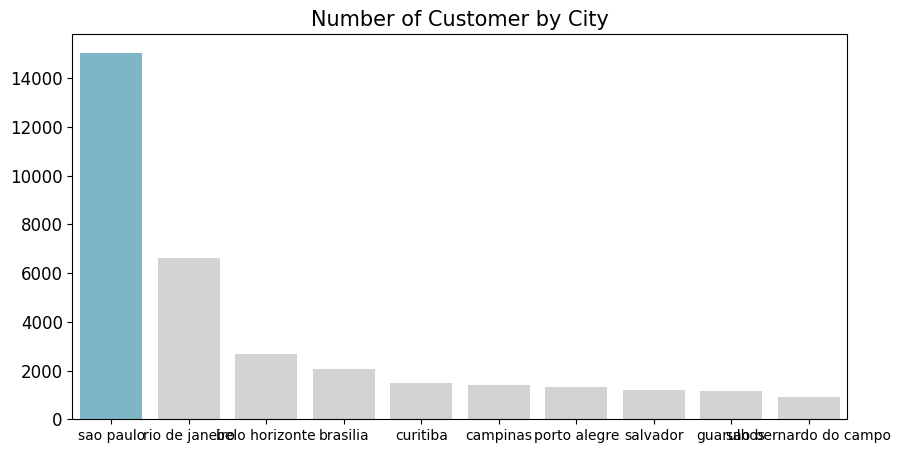

In [174]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_count",
    x="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Berdasarkan Negara Bagian

In [178]:
bystate_df = orders_customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df = bystate_df.sort_values(by="customer_count", ascending=False).reset_index(drop=True)
bystate_df

,customer_state,customer_count
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\798436215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\798436215.py:3: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


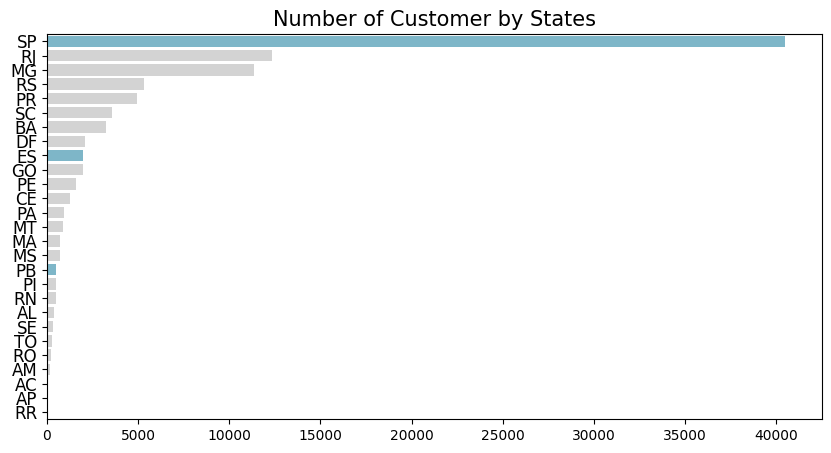

In [137]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Siapakah Penjual dengan jumlah penjualan tertinggi?

In [138]:
order_items_sellers_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
87180,c5f102432d2d19f7bb18da99dc9456f2,1,b74d57e3377dd78aace6d070fc48cc88,4a3ca9315b744ce9f8e9374361493884,2018-02-08 15:18:11,65.90,12.80,14940,ibitinga,SP
62888,8f9005e33af4e9098cb514dd5f44b0bb,1,fe6a9515d655fa7936b8a7c841039f34,dc317f341ab0e22f39acbd9dbf9b4a1f,2018-01-28 22:33:10,249.90,69.21,94910,cachoeirinha,RS
60433,89bc56fc811f39de05111fa8d720ac60,1,b2e7c39bb137bb4b3651862c6b611468,897060da8b9a21f655304d50fd935913,2017-08-10 11:03:39,49.90,11.85,14092,ribeirao preto,SP
28865,41af28fe8d828495ccf17c4a26e177f8,1,54d9ac713e253fa1fae9c8003b011c2a,955fee9216a65b617aa5c0531780ce60,2018-01-22 03:50:06,29.50,13.08,4782,sao paulo,SP
79239,b4423cdd0316fb3064befb92d164de96,1,21a95b5525c6d658ff4e5e1b50f7c02d,46dc3b2cc0980fb8ec44634e21d2718e,2017-09-20 14:30:22,149.99,13.93,22240,rio de janeiro,RJ


In [177]:
byseller_df = order_items_sellers_df.groupby(by="seller_id").order_id.nunique().reset_index()
byseller_df.rename(columns={
    "order_id": "product_count"
}, inplace=True)
byseller_df = byseller_df.sort_values(by="product_count", ascending=False).reset_index(drop=True)
byseller_df

,seller_id,product_count
0,6560211a19b47992c3666cc44a7e94c0,1854
1,4a3ca9315b744ce9f8e9374361493884,1806
2,cc419e0650a3c5ba77189a1882b7556a,1706
3,1f50f920176fa81dab994f9023523100,1404
4,da8622b14eb17ae2831f4ac5b9dab84a,1314
...,...,...
3090,ceb7b4fb9401cd378de7886317ad1b47,1
3091,cecd97bc34ed8330bd4cd15713eda670,1
3092,5b92bfa4120daa27c574daa2e386c693,1
3093,5aaa890629f83706d8d9bfecd8377c1c,1


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2853168653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


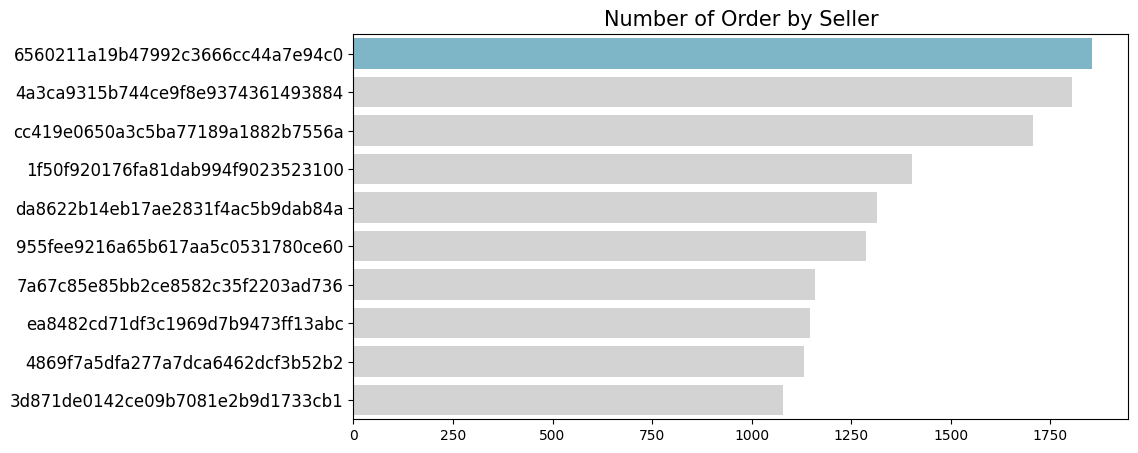

In [140]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="product_count", 
    y="seller_id",
    data=byseller_df.sort_values(by="product_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Order by Seller", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Metode pembayaran yang paling sering digunakan dan yang arang digunakan?

In [141]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51015,5f0cbb1b71a81f142f6760c5023a28bc,1,credit_card,1,83.88
2041,e4cbb88fcf9a02837b22b1f6f812a9ed,2,voucher,1,25.00
41652,b4c86abf900a8e53f4b9622532c87ea4,1,credit_card,3,270.32
67062,45973912e490866800c0aea8f63099c8,1,credit_card,10,401.30
45302,546925c91dae6410ea5a21172f637370,1,credit_card,5,478.05


In [142]:
bypayment_type_df = order_payments_df.groupby(by="payment_type").order_id.nunique().reset_index()
bypayment_type_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
bypayment_type_df

,payment_type,order_count
0,boleto,19784
1,credit_card,76505
2,debit_card,1528
3,not_defined,3
4,voucher,3866


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2247704618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2247704618.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


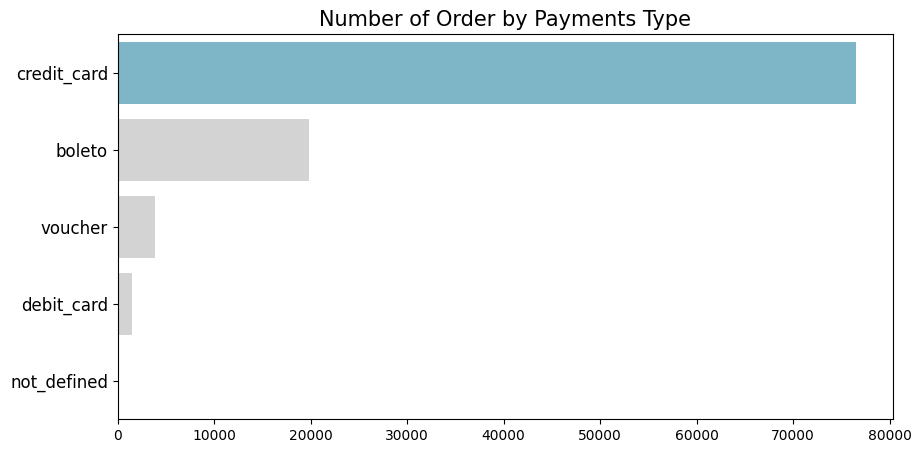

In [143]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="order_count", 
    y="payment_type",
    data=bypayment_type_df.sort_values(by="order_count", ascending=False),
    palette=colors_
)
plt.title("Number of Order by Payments Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Berapakan jumlah nilai dari setiap ratingnya?

In [144]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
93369,06408729c86f3acfa45f4545c96ce67c,a93b122106fb3a1e62510b02010af8d2,2,Recomendo com ressalvas.,Recebi o MP3 sem o fone de ouvido.,2018-07-25 00:00:00,2018-07-26 14:39:46
73021,c334822ffbfeee371d552349e7e057d2,b016b176ba1599cc8e192f447c432bab,1,Antena,Nao compre essa antena nao presta nao pega nen...,2018-07-04 00:00:00,2018-07-06 18:42:15
80941,cd741a5666f8f77bae105f6d49b03529,6782b1071318ad334c2a648586098947,5,produto muito bacana,muito prático para apartamento e visual elegante.,2018-08-22 00:00:00,2018-08-23 12:26:20
80344,78b71c155969e2366f6c2ec2dccb868b,897abc3130a6d4c579a229b45349f611,4,recomendado,É SEMPRE O PRAZER COMPRAR NA AS lannister......,2018-08-10 00:00:00,2018-08-10 19:21:50
92612,ea5b927fa827584da27675794306c3e7,acf1727645a8acc35c463a98c6cea8c1,5,Ótimo produto,Amei a qualidade e o designer!!!,2018-08-29 00:00:00,2018-09-11 00:18:09


In [145]:
byrating_df = order_reviews_df.groupby(by="review_score").review_id.nunique().reset_index()
byrating_df.rename(columns={
    "review_id": "rating_count"
}, inplace=True)
byrating_df

,review_score,rating_count
0,1,1771
1,2,452
2,3,733
3,4,1430
4,5,5412


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\2305068818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


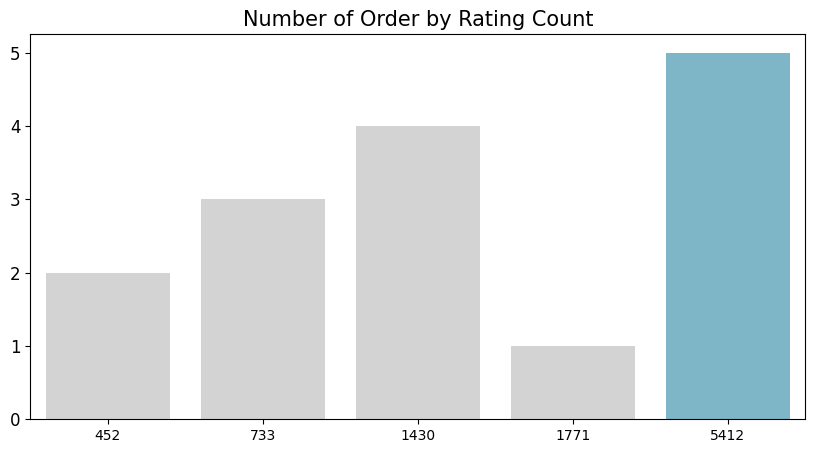

In [162]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(
    x="rating_count", 
    y="review_score",
    data=byrating_df.sort_values(by="rating_count", ascending=False),
    palette=colors_
)
plt.title("Number of Order by Rating Count", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## RFM Analysis

In [147]:
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [148]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [149]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


In [150]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


In [151]:
rfm_df.describe()

,frequency,monetary,recency
count,96461.0,96461.000000,96461.000000
mean,1.0,143.182335,239.640953
std,0.0,236.971684,152.830809
min,1.0,0.850000,0.000000
25%,1.0,47.250000,116.000000
50%,1.0,89.000000,221.000000
75%,1.0,152.900000,349.000000
max,1.0,13440.000000,713.000000


In [152]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
86865,e60df9449653a95af4549bbfcb18a6eb,1,418.00,0
25778,448945bc713d98b6726e82eda6249b9e,1,457.75,0
6218,10a79ef2783cae3d8d678e85fde235ac,1,6.90,0
86192,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,0
27628,496630b6740bcca28fce9ba50d8a26ef,1,24.90,0


In [153]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
64304,aa5e0a0c36015d39de864189a2b00b09,1,76.00,15
64313,aa6190994371836fc1d4596edd827abd,1,210.00,244
64312,aa606152f23a5fa9ba3d0b87f7a492e8,1,55.00,225
64311,aa601b3c45980c0918042d5ca7a25054,1,49.99,167


C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\4286489001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\4286489001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\4286489001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

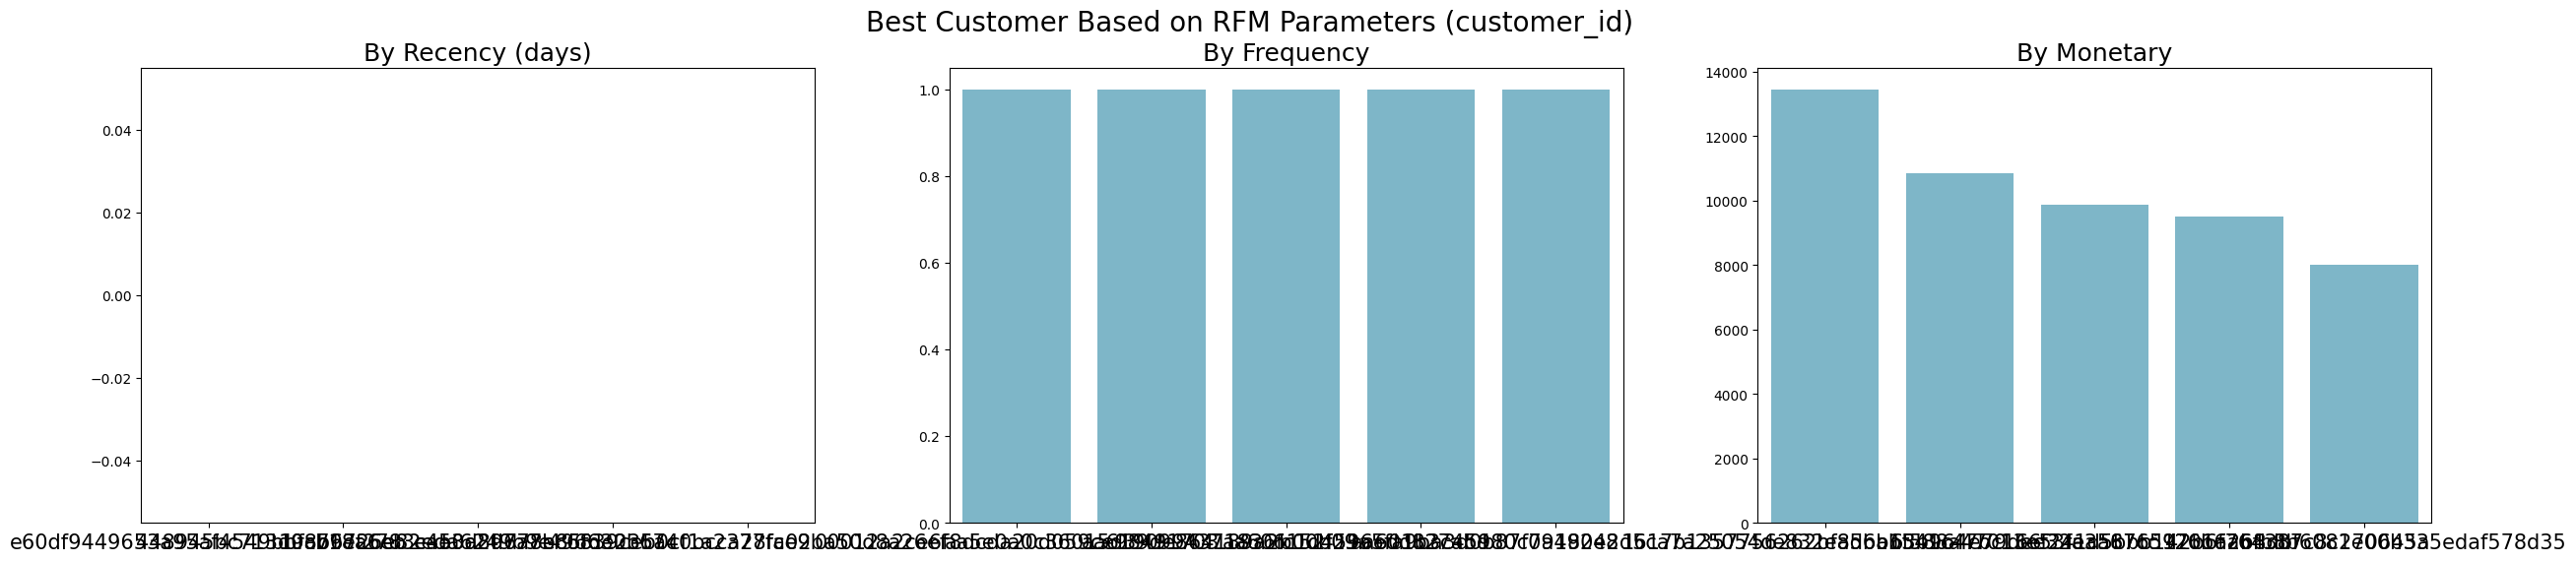

In [154]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Mengurutkan customers berdasarkan recency, frequency, & monetary score

In [155]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32945.5,48231.0,48528.5
1,000161a058600d5901f007fab4c27140,1,54.90,409,16036.0,48231.0,29974.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2635.0,48231.0,77596.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20206.5,48231.0,71199.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,64649.5,48231.0,50887.0


In [156]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,34.155988,100.0,50.308933
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.625197,100.0,31.073698
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.731816,100.0,80.442873
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.948930,100.0,73.811178
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,67.024861,100.0,52.753963


In [157]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.09
1,000161a058600d5901f007fab4c27140,2.41
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.49
6,000419c5494106c306a97b5635748086,2.31


## Segementasi customer berdasarkan RFM_score

In [158]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.09,Medium value customer
1,000161a058600d5901f007fab4c27140,2.41,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.49,Low value customers
6,000419c5494106c306a97b5635748086,2.31,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.79,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [159]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15669
1,Low value customers,40469
2,Medium value customer,33876
3,Top customers,5352
4,lost customers,1095


In [160]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\Asy Syams Darussalam\AppData\Local\Temp\ipykernel_3432\1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


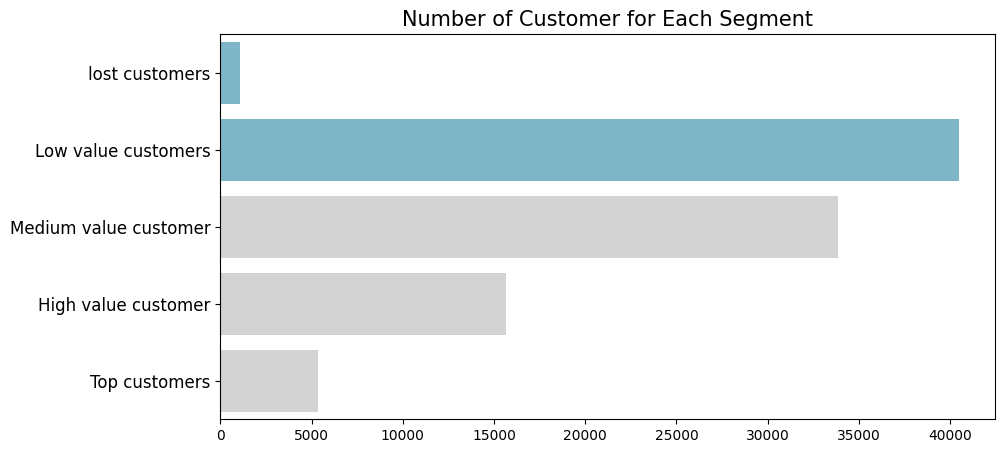

In [161]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

## Kesimpulan Dari Pertanyaan Bisnis
### 1. Bagaimana performa penjualan dan revenue e-commerce dalam beberapa bulan terakhir?
#### Kesimpulan : Performa penjualan dan revenue dalam beberapa bulan terakhir cenderung naik, dan sedikit terdapat penurunan dalam bulan-bulan tertentu
### 2. Kategori Produk apa yang paling banyak dan paling sedikit terjual?
#### Kesimpulan : Kategori Produk yang paling banyak terjual yaitu Cama Mesa Banho, dan yang paling sedikit terjual yaitu Seguros E Sevicos
### 3. Bagaimana Demografi Pelanggan di E-commerce Public?
#### Kesimpulan : Untuk demografi pelanggan berdasarkan pada kota pelanggan yaitu paling banyak berasal dari kota sao paulo dengan jumlah pelnggan sebanyak 15044, sedangkan berdasarkan pada negara bagian customer yaitu paling banyak berasal dari Negara Bagian SP dengan jumlah pelanggan sebanyak 40489.
### 4. Siapakah Seller / Penjual dengan jumlah penjualan tertinggi?
#### Kesimpulan : Penjual dengan jumlah order tertinggi yaitu penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 dengan jumlah order sebanyak 1854 orderan
### 5. Metode pembayaran yang paling sering digunakan dan yang sedikit digunakan?
#### Kesimpulan : Metode pembayaran yang sering digunakan oleh pelanggan yaitu dengan menggunakan Credit Card, dan yang sedikit digunakan yaitu metode debit card
### 6. Berapakan jumlah nilai dari setiap ratingnya?
#### Kesimpulan : Orderan yang memberikan rating bintang 5 sebanyak 5412 pelanggan, rating bintang 4 sebanyak 1430, rating bintang 3 sebanyak 733, rating bintang 2 sebanyak 452, dan rating bintang 1 sebanyak 1771 pelanggan.